In [6]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import os
from tqdm import tqdm_notebook

In [5]:
! pip3 install tqdm Pillow pandas opencv-python
! apt install -y libsm-dev libxrender-dev libxext-dev

You should consider upgrading via the 'pip install --upgrade pip' command.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libbsd0 libice-dev libice6 libpthread-stubs0-dev libsm6 libx11-6 libx11-data
  libx11-dev libx11-doc libxau-dev libxau6 libxcb1 libxcb1-dev libxdmcp-dev
  libxdmcp6 libxext6 libxrender1 x11-common x11proto-core-dev x11proto-dev
  x11proto-xext-dev xorg-sgml-doctools xtrans-dev
Suggested packages:
  libice-doc libsm-doc libxcb-doc libxext-doc
The following NEW packages will be installed:
  libbsd0 libice-dev libice6 libpthread-stubs0-dev libsm-dev libsm6 libx11-6
  libx11-data libx11-dev libx11-doc libxau-dev libxau6 libxcb1 libxcb1-dev
  libxdmcp-dev libxdmcp6 libxext-dev libxext6 libxrender-dev libxrender1
  x11-common x11proto-core-dev x11proto-dev x11proto-xext-dev
  xorg-sgml-doctools xtrans-dev
0 upgraded, 26 newly installed, 0 to remove and 13 not upgraded.


7Progress: [ 18%] [##########................................................] 87Progress: [ 18%] [##########................................................] 8Selecting previously unselected package libice6:amd64.
Preparing to unpack .../08-libice6_2%3a1.0.9-2_amd64.deb ...
7Progress: [ 19%] [###########...............................................] 8Unpacking libice6:amd64 (2:1.0.9-2) ...
7Progress: [ 21%] [###########...............................................] 8Selecting previously unselected package libsm6:amd64.
Preparing to unpack .../09-libsm6_2%3a1.2.2-1_amd64.deb ...
7Progress: [ 21%] [############..............................................] 8Unpacking libsm6:amd64 (2:1.2.2-1) ...
7Progress: [ 22%] [############..............................................] 8Selecting previously unselected package xorg-sgml-doctools.
Preparing to unpack .../10-xorg-sgml-doctools_1%3a1.11-1_all.deb ...
7Progress: [ 24%] [#############.....................................

7Progress: [ 63%] [####################################......................] 87Progress: [ 64%] [#####################################.....................] 8Setting up x11proto-dev (2018.4-4) ...
7Progress: [ 66%] [######################################....................] 8Setting up xtrans-dev (1.3.5-1) ...
7Progress: [ 66%] [######################################....................] 87Progress: [ 67%] [######################################....................] 8Setting up x11proto-xext-dev (2018.4-4) ...
7Progress: [ 69%] [#######################################...................] 8Processing triggers for libc-bin (2.27-3ubuntu1) ...
Setting up libx11-doc (2:1.6.4-3ubuntu0.2) ...
7Progress: [ 69%] [########################################..................] 87Progress: [ 70%] [########################################..................] 8Setting up libxdmcp6:amd64 (1:1.1.2-3) ...
7Progress: [ 72%] [#########################################.................] 8

In [9]:
# Clean folders
distances = [5, 10, 25, 100]
def folder_for_dist(d):
    return Path(f"data/Data_RealCameraSense_Recording/Input_Frame_Folder/Frame_{d}m")

for d in distances:
    for p in tqdm_notebook(folder_for_dist(d).glob("*Mult*")):
        os.unlink(str(p))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


In [8]:

list(path.glob("*"))

[PosixPath('data/Data_RealCameraSense_Recording/Input_Frame_Folder/Frame_5m/01040MultDepthFrame5m.jpg'),
 PosixPath('data/Data_RealCameraSense_Recording/Input_Frame_Folder/Frame_5m/00174ColorFrame5m.jpg'),
 PosixPath('data/Data_RealCameraSense_Recording/Input_Frame_Folder/Frame_5m/00145MultDepthFrame5m.jpg'),
 PosixPath('data/Data_RealCameraSense_Recording/Input_Frame_Folder/Frame_5m/00396ColorFrame5m.jpg'),
 PosixPath('data/Data_RealCameraSense_Recording/Input_Frame_Folder/Frame_5m/00458MultDepthFrame5m.jpg'),
 PosixPath('data/Data_RealCameraSense_Recording/Input_Frame_Folder/Frame_5m/00473ColorFrame5m.jpg'),
 PosixPath('data/Data_RealCameraSense_Recording/Input_Frame_Folder/Frame_5m/00407DepthFrame5m.jpg'),
 PosixPath('data/Data_RealCameraSense_Recording/Input_Frame_Folder/Frame_5m/00452MultDepthFrame5m.jpg'),
 PosixPath('data/Data_RealCameraSense_Recording/Input_Frame_Folder/Frame_5m/01272ColorFrame5m.jpg'),
 PosixPath('data/Data_RealCameraSense_Recording/Input_Frame_Folder/Frame_5m

(-0.5, 639.5, 479.5, -0.5)

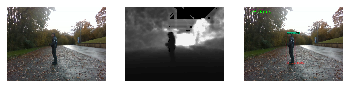

In [31]:
def read_frame(distance, id):    
    path = Path(f"data/Data_RealCameraSense_Recording/Input_Frame_Folder/Frame_{distance}m")
    output_path = Path(f"data/Data_RealCameraSense_Recording/Output_YOLO_Process/Output_{distance}m")
    depth = plt.imread(path / f"{id:05d}DepthFrame{distance}m.jpg")
    rgb = plt.imread(path / f"{id:05d}ColorFrame{distance}m.jpg")
    predicted = plt.imread(output_path /  f"{id:05d}ResultFrame{distance}m.jpg")
    return rgb, depth, predicted

rgb, depth, pred = read_frame(5, 500)
plt.figure()
plt.subplot(131)
plt.axis("off")
plt.imshow(rgb)
plt.subplot(132)
plt.imshow(depth, cmap="gray")
plt.axis("off")
plt.subplot(133)
plt.imshow(pred)
plt.axis("off")

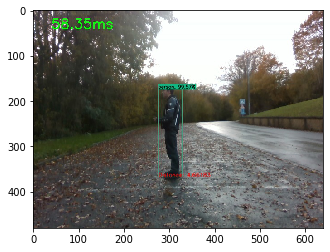

In [32]:
plt.imshow(pred)

In [28]:
distance = 5
output_path = Path(f"data/Data_RealCameraSense_Recording/Output_YOLO_Process/Output_{distance}m")
list(output_path.glob("*.jpg"))

[PosixPath('data/Data_RealCameraSense_Recording/Output_YOLO_Process/Output_5m/00723ResultFrame5m.jpg'),
 PosixPath('data/Data_RealCameraSense_Recording/Output_YOLO_Process/Output_5m/00751ResultFrame5m.jpg'),
 PosixPath('data/Data_RealCameraSense_Recording/Output_YOLO_Process/Output_5m/01188ResultFrame5m.jpg'),
 PosixPath('data/Data_RealCameraSense_Recording/Output_YOLO_Process/Output_5m/01210ResultFrame5m.jpg'),
 PosixPath('data/Data_RealCameraSense_Recording/Output_YOLO_Process/Output_5m/01457ResultFrame5m.jpg'),
 PosixPath('data/Data_RealCameraSense_Recording/Output_YOLO_Process/Output_5m/00105ResultFrame5m.jpg'),
 PosixPath('data/Data_RealCameraSense_Recording/Output_YOLO_Process/Output_5m/00196ResultFrame5m.jpg'),
 PosixPath('data/Data_RealCameraSense_Recording/Output_YOLO_Process/Output_5m/00890ResultFrame5m.jpg'),
 PosixPath('data/Data_RealCameraSense_Recording/Output_YOLO_Process/Output_5m/01366ResultFrame5m.jpg'),
 PosixPath('data/Data_RealCameraSense_Recording/Output_YOLO_Proc

In [18]:
def read_results_csv(distance):
    path = Path(f"data/Data_RealCameraSense_Recording/Output_YOLO_Process/Output_{distance}m/CameraRealSenseResearch.csv")
    csv = pd.read_csv(path)
    return csv

csv = read_results_csv(5)

In [21]:
csv.iloc[499]

Image                 00500ResultFrame5m.jpg
Box[x1]                                  276
Box[x2]                                  329
Box[y1]                                  174
Box[y2]                                  367
DepthQuantile[0.1]                   4.66183
DepthQuantile[0.2]                   4.66183
DepthQuantile[0.3]                   4.66183
DepthQuantile[0.4]                   4.66183
DepthQuantile[0.5]                   4.66183
DepthQuantile[0.6]                   4.89471
DepthQuantile[0.7]                   4.89471
DepthQuantile[0.8]                   5.28972
DepthQuantile[0.9]                   5.91805
Name: 499, dtype: object

In [32]:
def 

(0, 255)

In [30]:
depth * 0.001

array([[0.018, 0.018, 0.018, ..., 0.032, 0.032, 0.032],
       [0.017, 0.018, 0.018, ..., 0.032, 0.032, 0.032],
       [0.017, 0.017, 0.017, ..., 0.031, 0.032, 0.032],
       ...,
       [0.003, 0.003, 0.003, ..., 0.003, 0.003, 0.003],
       [0.003, 0.003, 0.003, ..., 0.003, 0.003, 0.003],
       [0.003, 0.003, 0.003, ..., 0.003, 0.003, 0.003]])